In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


# specify dtype of columns
dtypes = {'rname' : str, 'endpos': int, 'numreads': int, 'covbases': int, 'coverage': float, 'meandepth': float, 'meanbaseq': float, 'meanmapq': float}

# read csv files with specified dtype
run1_reads = pd.read_csv("/kwak/hub/25_cbelliardo/MISTIC/Salade_I/mapping_SR_LR_reads/cleaned_run1__vs__hifireads.bam.sorted.coverage", sep="\t", dtype=dtypes)
run1_assembly = pd.read_csv("/kwak/hub/25_cbelliardo/MISTIC/Salade_I/mapping_SR_LR_assembly/cleaned_run1__vs__hifi_assembly.bam.sorted.coverage",  sep="\t", dtype=dtypes)

# apply dtypes to columns
run1_reads.columns = run1_reads.columns.astype(str) 


In [21]:
run1_reads_melt = pd.melt(run1_reads, id_vars=['#rname'], value_vars=['numreads', 'covbases', 'coverage', 'meandepth', 'meanbaseq', 'meanmapq'])

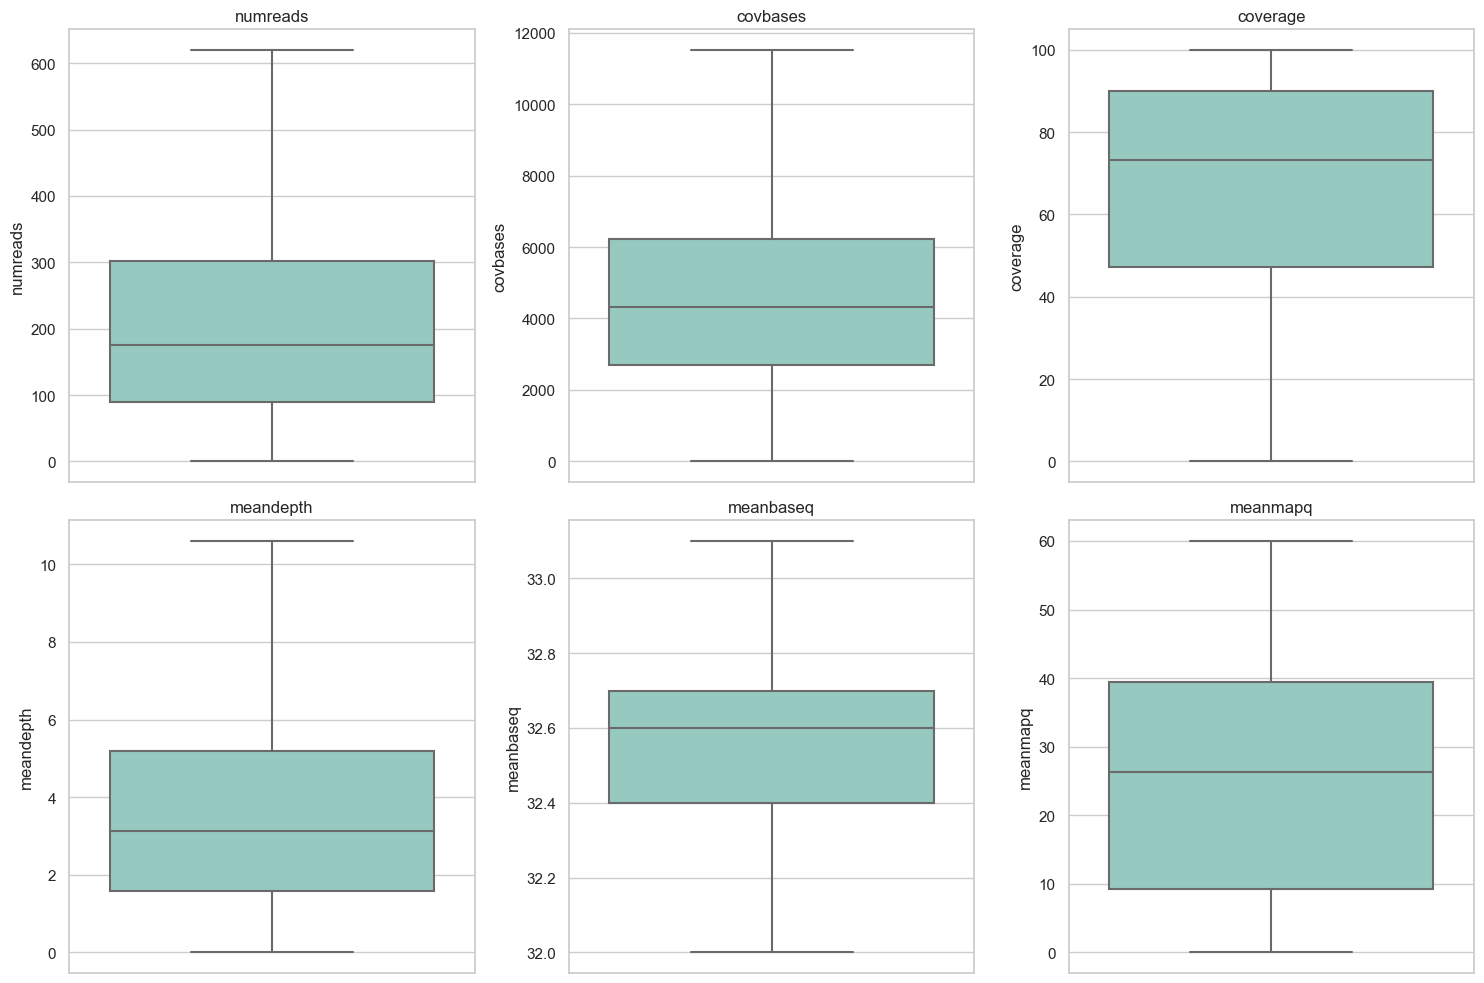

In [33]:
# create a list of column names to loop through
cols = ['numreads', 'covbases', 'coverage', 'meandepth', 'meanbaseq', 'meanmapq']

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# loop through the columns and create a separate boxplot for each
for col, ax in zip(cols, axs.flatten()):
    sns.boxplot(y=run1_reads[col], palette="Set3", ax=ax, showfliers=False)
    ax.set_title(col)

# adjust spacing between subplots
plt.tight_layout()


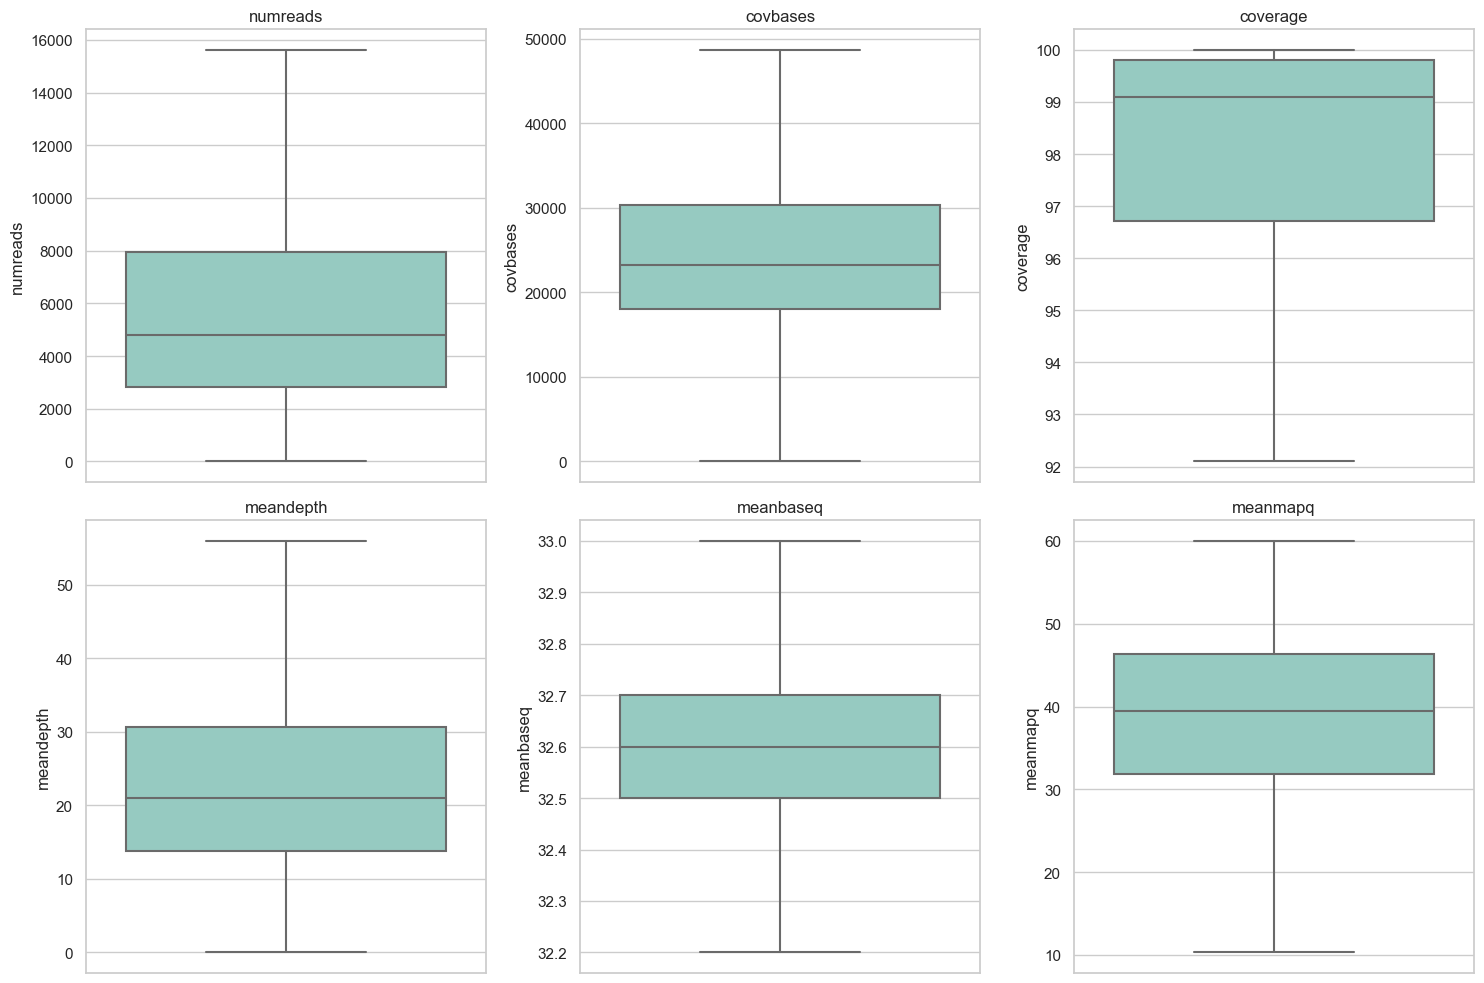

In [34]:
# create a list of column names to loop through
cols = ['numreads', 'covbases', 'coverage', 'meandepth', 'meanbaseq', 'meanmapq']

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# loop through the columns and create a separate boxplot for each
for col, ax in zip(cols, axs.flatten()):
    sns.boxplot(y=run1_assembly[col], palette="Set3", ax=ax, showfliers=False)
    ax.set_title(col)

# adjust spacing between subplots
plt.tight_layout()


In [40]:
# concatene run1_reads and run1_assembly
run1_reads['reference'] = 'reads'
run1_assembly['reference'] = 'assembly'

In [42]:
# concatenate run1_reads and run1_assembly vertically
df_concat = pd.concat([run1_reads, run1_assembly], axis=0)
# reset index
df_concat = df_concat.reset_index(drop=True)

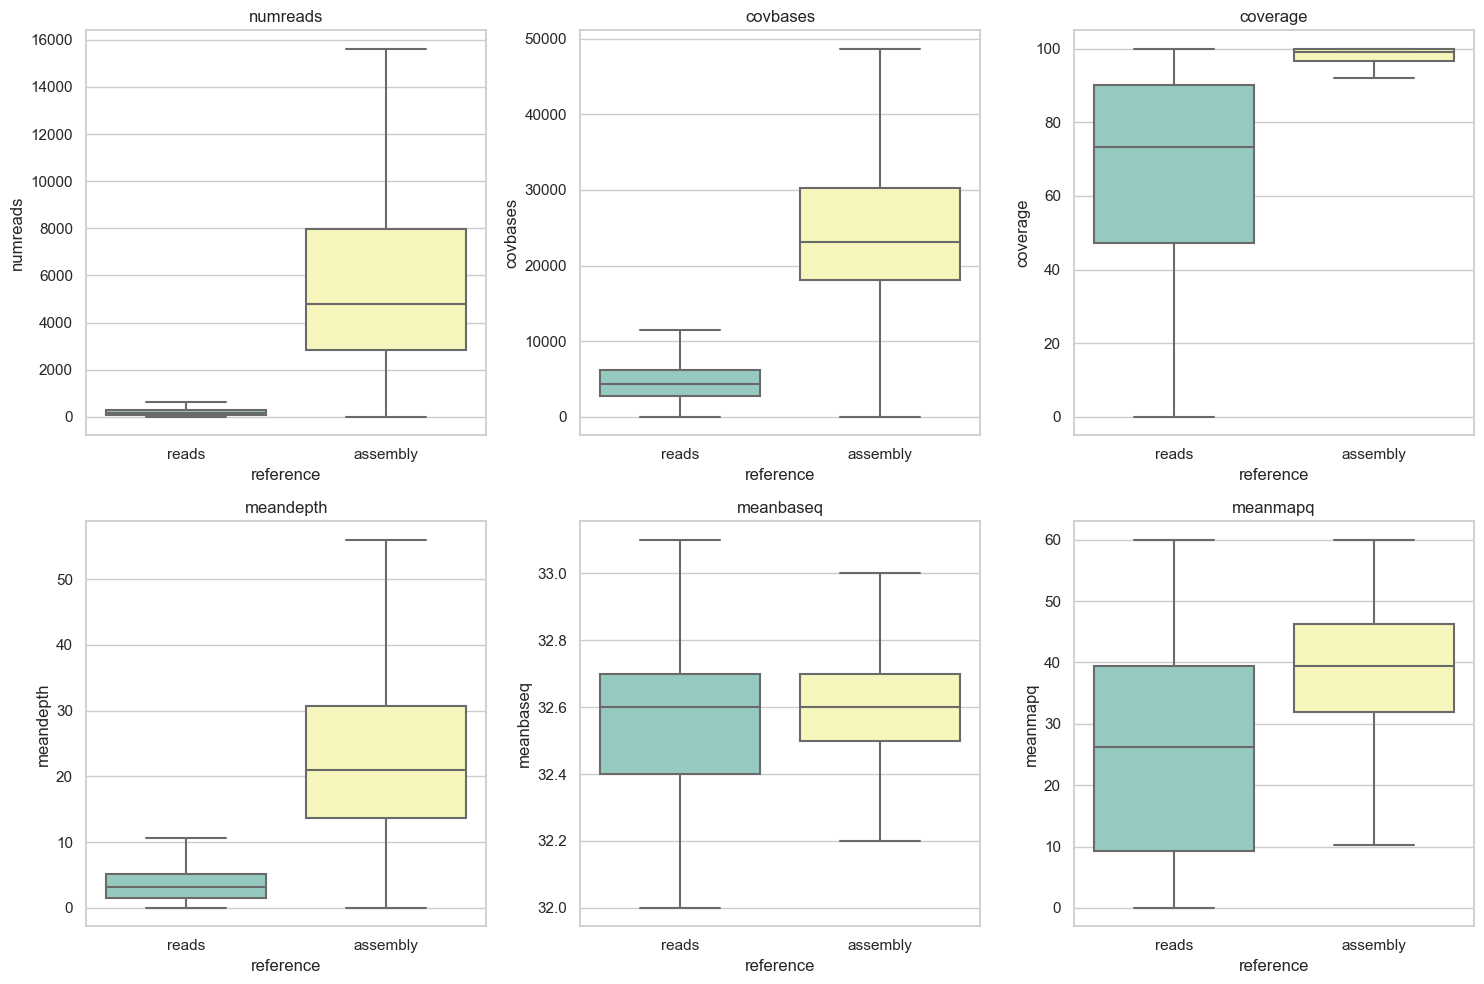

In [52]:
# create a list of column names to loop through
cols = ['numreads', 'covbases', 'coverage', 'meandepth', 'meanbaseq', 'meanmapq']

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# loop through the columns and create a separate boxplot for each
for col, ax in zip(cols, axs.flatten()):
    sns.boxplot(y=df_concat[col], x=df_concat['reference'], palette="Set3", ax=ax, showfliers=False)
    ax.set_title(col)

# adjust spacing between subplots
plt.tight_layout()
